In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
df=pd.read_csv('C:/Users/amishr22/Downloads/FinalData1029.csv')

In [4]:
df.isnull().sum()

Unnamed: 0                                             0
Unnamed: 0.1                                           0
Loan Identifier                                        0
Seller Name                                            0
Original Interest Rate                                 0
Current Interest Rate                                  0
Original UPB                                           0
Current Actual UPB                                     0
Original Loan Term                                     0
First Payment Date                                     0
Loan Age                                               0
Original Combined Loan to Value Ratio (CLTV)           0
Debt-To-Income (DTI)                                   0
Borrower Credit Score at Origination                   0
Loan Purpose                                           0
Property Type                                          0
Amortization Type                                      0
Months to Amortization         

In [5]:
df['Status'].value_counts()

 0    12919034
 1      386522
-1           6
Name: Status, dtype: int64

In [7]:
#df1=df.drop(['Months to Amortization','Loan Payment History','Zero Balance Code'],axis=1)
df.shape

(13305562, 30)

In [8]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Loan Identifier,Seller Name,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,First Payment Date,...,Zero Balance Code,Monthly Reporting Period,Property State,Status,Target,HPI,CPI,PI,RGDP,UEMP
0,0,78,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,22006,CA,0,0,183.288,0.201715,11151.4,15244.088,4.8
1,1,79,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,32006,CA,0,0,184.365,0.553598,11195.7,15244.088,4.7
2,2,80,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,42006,CA,0,0,184.329,0.850851,11190.3,15281.525,4.7
3,3,81,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,52006,CA,0,0,184.157,0.496278,11182.7,15281.525,4.6
4,4,82,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,62006,CA,0,0,183.508,0.197531,11198.2,15281.525,4.6


In [9]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Loan Identifier', 'Seller Name',
       'Original Interest Rate', 'Current Interest Rate', 'Original UPB',
       'Current Actual UPB', 'Original Loan Term', 'First Payment Date',
       'Loan Age', 'Original Combined Loan to Value Ratio (CLTV)',
       'Debt-To-Income (DTI)', 'Borrower Credit Score at Origination',
       'Loan Purpose ', 'Property Type', 'Amortization Type',
       'Months to Amortization', 'Current Loan Delinquency Status',
       'Loan Payment History', 'Zero Balance Code', 'Monthly Reporting Period',
       'Property State', 'Status', 'Target', 'HPI', 'CPI', 'PI', 'RGDP',
       'UEMP'],
      dtype='object')

In [10]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Loan Identifier,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,First Payment Date,Loan Age,...,Loan Payment History,Zero Balance Code,Monthly Reporting Period,Status,Target,HPI,CPI,PI,RGDP,UEMP
count,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,...,0.0,3536629.0,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07,1.330556e+07
mean,8.656475e+05,1.603272e+06,5.506116e+11,6.250259e+00,6.067367e+00,2.425678e+05,1.995046e+05,3.393104e+02,6.668532e+04,4.288819e+01,...,NaN,1.0,6.705699e+04,2.904921e-02,1.938821e-02,1.600163e+02,1.595748e-01,1.206049e+04,1.598405e+04,7.050089e+00
std,6.537474e+05,1.219173e+06,2.584074e+11,3.985044e-01,8.460555e-01,1.023834e+05,1.179508e+05,5.582431e+01,3.399882e+04,3.610164e+01,...,NaN,0.0,3.459967e+04,1.679472e-01,2.314426e-01,1.786643e+01,4.687881e-01,7.630582e+02,8.426663e+02,2.067318e+00
min,0.000000e+00,0.000000e+00,1.000069e+11,4.250000e+00,2.000000e+00,1.400000e+04,0.000000e+00,6.000000e+01,1.200600e+04,-1.000000e+00,...,NaN,1.0,1.200600e+04,-1.000000e+00,-1.000000e+00,1.365320e+02,-1.915290e+00,1.109670e+04,1.516177e+04,3.500000e+00
25%,2.973010e+05,5.432630e+05,3.272243e+11,6.000000e+00,5.875000e+00,1.630000e+05,1.177529e+05,3.600000e+02,4.200700e+04,1.500000e+01,...,NaN,1.0,3.202000e+04,0.000000e+00,0.000000e+00,1.457160e+02,-6.708631e-02,1.154760e+04,1.545606e+04,4.900000e+00
50%,7.387500e+05,1.360648e+06,5.521199e+11,6.250000e+00,6.250000e+00,2.350000e+05,1.984539e+05,3.600000e+02,6.200700e+04,3.300000e+01,...,NaN,1.0,7.200600e+04,0.000000e+00,0.000000e+00,1.542050e+02,1.937975e-01,1.175530e+04,1.572628e+04,7.300000e+00
75%,1.332915e+06,2.466006e+06,7.748436e+11,6.500000e+00,6.500000e+00,3.170000e+05,2.858004e+05,3.600000e+02,9.200800e+04,6.100000e+01,...,NaN,1.0,1.020060e+05,0.000000e+00,0.000000e+00,1.748110e+02,4.462212e-01,1.231110e+04,1.617997e+04,9.000000e+00
max,2.625278e+06,4.861961e+06,9.999974e+11,8.625000e+00,8.625000e+00,8.020000e+05,7.983730e+05,3.600000e+02,1.220080e+05,1.750000e+02,...,NaN,1.0,1.220190e+05,1.000000e+00,2.000000e+00,2.166320e+02,1.007700e+00,1.506880e+04,1.920231e+04,1.000000e+01


In [11]:
df.nunique(axis=0)

Unnamed: 0                                      2625279
Unnamed: 0.1                                    4059025
Loan Identifier                                   89780
Seller Name                                           1
Original Interest Rate                               77
Current Interest Rate                               109
Original UPB                                        718
Current Actual UPB                              3029858
Original Loan Term                                   30
First Payment Date                                   49
Loan Age                                            177
Original Combined Loan to Value Ratio (CLTV)        102
Debt-To-Income (DTI)                                 64
Borrower Credit Score at Origination                334
Loan Purpose                                          3
Property Type                                         4
Amortization Type                                     1
Months to Amortization                          

In [12]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Loan Identifier,Seller Name,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,First Payment Date,...,Zero Balance Code,Monthly Reporting Period,Property State,Status,Target,HPI,CPI,PI,RGDP,UEMP
0,0,78,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,22006,CA,0,0,183.288,0.201715,11151.4,15244.088,4.8
1,1,79,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,32006,CA,0,0,184.365,0.553598,11195.7,15244.088,4.7
2,2,80,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,42006,CA,0,0,184.329,0.850851,11190.3,15281.525,4.7
3,3,81,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,52006,CA,0,0,184.157,0.496278,11182.7,15281.525,4.6
4,4,82,100260169243,"Bank Of America, N.A.",6.0,6.0,235000.0,0.0,240,32006,...,NaN,62006,CA,0,0,183.508,0.197531,11198.2,15281.525,4.6


In [13]:
df_backup=df.copy()

In [14]:
df=df.drop(['Unnamed: 0','Unnamed: 0.1','Property State','Seller Name','Zero Balance Code','Loan Identifier','Zero Balance Code', 'Property State','Monthly Reporting Period','First Payment Date','Months to Amortization','Status'],axis=1)

In [15]:
df.head()

,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Loan Age,Original Combined Loan to Value Ratio (CLTV),Debt-To-Income (DTI),Borrower Credit Score at Origination,Loan Purpose,Property Type,Amortization Type,Current Loan Delinquency Status,Loan Payment History,Target,HPI,CPI,PI,RGDP,UEMP
0,6.0,6.0,235000.0,0.0,240,0.0,56.0,39.0,659.0,C,SF,FRM,0,NaN,0,183.288,0.201715,11151.4,15244.088,4.8
1,6.0,6.0,235000.0,0.0,240,1.0,56.0,39.0,659.0,C,SF,FRM,0,NaN,0,184.365,0.553598,11195.7,15244.088,4.7
2,6.0,6.0,235000.0,0.0,240,2.0,56.0,39.0,659.0,C,SF,FRM,0,NaN,0,184.329,0.850851,11190.3,15281.525,4.7
3,6.0,6.0,235000.0,0.0,240,3.0,56.0,39.0,659.0,C,SF,FRM,0,NaN,0,184.157,0.496278,11182.7,15281.525,4.6
4,6.0,6.0,235000.0,0.0,240,4.0,56.0,39.0,659.0,C,SF,FRM,0,NaN,0,183.508,0.197531,11198.2,15281.525,4.6


In [18]:
df=df.drop(['Loan Purpose ', 'Property Type', 'Amortization Type', 'Loan Payment History'],axis=1)

In [19]:
df.head()

,Original Interest Rate,Current Interest Rate,Original UPB,Current Actual UPB,Original Loan Term,Loan Age,Original Combined Loan to Value Ratio (CLTV),Debt-To-Income (DTI),Borrower Credit Score at Origination,Current Loan Delinquency Status,Target,HPI,CPI,PI,RGDP,UEMP
0,6.0,6.0,235000.0,0.0,240,0.0,56.0,39.0,659.0,0,0,183.288,0.201715,11151.4,15244.088,4.8
1,6.0,6.0,235000.0,0.0,240,1.0,56.0,39.0,659.0,0,0,184.365,0.553598,11195.7,15244.088,4.7
2,6.0,6.0,235000.0,0.0,240,2.0,56.0,39.0,659.0,0,0,184.329,0.850851,11190.3,15281.525,4.7
3,6.0,6.0,235000.0,0.0,240,3.0,56.0,39.0,659.0,0,0,184.157,0.496278,11182.7,15281.525,4.6
4,6.0,6.0,235000.0,0.0,240,4.0,56.0,39.0,659.0,0,0,183.508,0.197531,11198.2,15281.525,4.6


In [20]:
df.isnull().sum()

Original Interest Rate                          0
Current Interest Rate                           0
Original UPB                                    0
Current Actual UPB                              0
Original Loan Term                              0
Loan Age                                        0
Original Combined Loan to Value Ratio (CLTV)    0
Debt-To-Income (DTI)                            0
Borrower Credit Score at Origination            0
Current Loan Delinquency Status                 0
Target                                          0
HPI                                             0
CPI                                             0
PI                                              0
RGDP                                            0
UEMP                                            0
dtype: int64

In [29]:
conditions=[df['Target']==-1,df['Target']==0,df['Target']==1,df['Target']==2]
choices=['Prepaid','Good Standing (GS)','Delinquent (DL)','Defaulted (DF)']
df['Target1']=np.select(conditions,choices)

In [6]:
df['Target'].value_counts()

 0    12689164
 1      386522
-1      196101
 2       33775
Name: Target, dtype: int64

In [67]:
df['Target1'].value_counts()*100/len(df)
#95% of the loan data points are in good standing, only 1.5 percent are prepaid, 2.9% delinquent and 0.25% defaulting

Good Standing (GS)    95.367366
Delinquent (DL)        2.904966
Prepaid                1.473827
Defaulted (DF)         0.253841
Name: Target1, dtype: float64

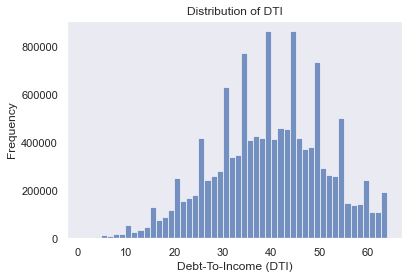

In [64]:
sns.set_theme(style='dark')
hist1=sns.histplot(data=df,x='Debt-To-Income (DTI)',bins=50)
hist1.set_title('Distribution of DTI')
hist1.set_ylabel('Frequency')
plt.show()
#the distribution is similar to normal wit peaks at 10s since that is more commonly used in processing

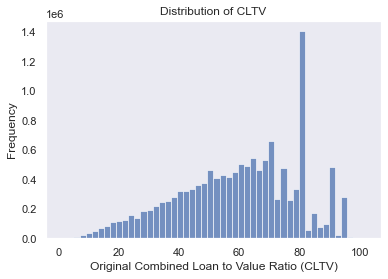

In [63]:
sns.set_theme(style='dark')
hist1=sns.histplot(data=df,x='Original Combined Loan to Value Ratio (CLTV)',bins=50)
hist1.set_title('Distribution of CLTV')
hist1.set_ylabel('Frequency')
plt.show()
#the peak at 80% is indicative of the LTV hitting the cileing of PMI

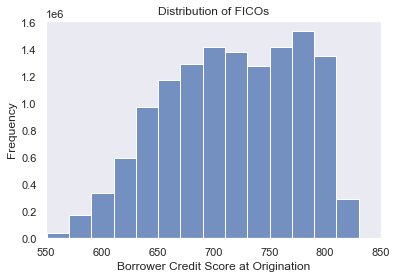

In [73]:
sns.set_theme(style='dark')
hist1=sns.histplot(data=df,x='Borrower Credit Score at Origination',bins=20)
hist1.set_title('Distribution of FICOs')
hist1.set_ylabel('Frequency')
hist1.set_xlim(550,850)
plt.show()
#fairly standard representation of the FICOS

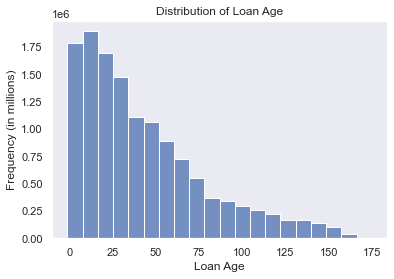

In [69]:
sns.set_theme(style='dark')
hist1=sns.histplot(data=df,x='Loan Age',bins=20)
hist1.set_title('Distribution of Loan Age')
hist1.set_ylabel('Frequency (in millions)')
plt.show()
#loan age will be naturally skewed towards the right as the data tracks the complete history of loans originated from 2006-08, therefore, the data points are more from the origination

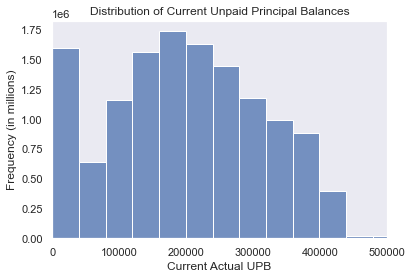

In [71]:
#Why this peak on the left, it is also ruining LGD projections in other projects?
sns.set_theme(style='dark')
hist1=sns.histplot(data=df,x='Current Actual UPB',bins=20)
hist1.set_title('Distribution of Current Unpaid Principal Balances')
hist1.set_ylabel('Frequency (in millions)')
hist1.set_xlim(0,500000)
plt.show()
#a strong percentage have low UPB, while it does peak at about 20000 

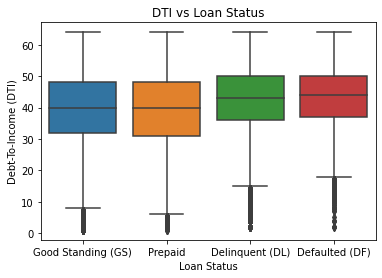

In [35]:
ax=sns.boxplot(data=df,x='Target1',y='Debt-To-Income (DTI)')
ax.set_xlabel('Loan Status')
ax.set_title('DTI vs Loan Status')
plt.show()
#the loans in good standing and those that are prepaid tend to have lower DTI and higher DTI has higher median value of DTI 

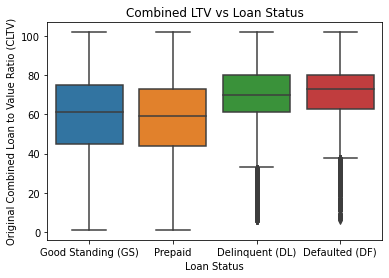

In [40]:
ax2=sns.boxplot(x='Target1',y='Original Combined Loan to Value Ratio (CLTV)',data=df)
ax2.set_xlabel('Loan Status')
ax2.set_title('Combined LTV vs Loan Status')
plt.show()
#higher delinquency in CLTV >80. 

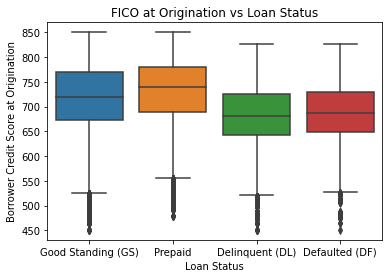

In [39]:
ax3=sns.boxplot(x='Target1',y='Borrower Credit Score at Origination',data=df)
ax3.set_xlabel('Loan Status')
ax3.set_title('FICO at Origination vs Loan Status')
plt.show()
#higher FICO implies lower likelihood of delinquency, lower FICO median in delinquent accounts. Interestingly, the FICO on average of defined default loans is higher than those of delinquent

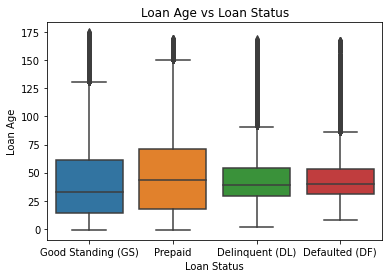

In [42]:
ax4=sns.boxplot(x='Target1',y='Loan Age',data=df)
ax4.set_xlabel('Loan Status')
ax4.set_title('Loan Age vs Loan Status')
plt.show()
#marginally lower median age with longer age in current loans implying that the loans which default do so max by age 60-80.

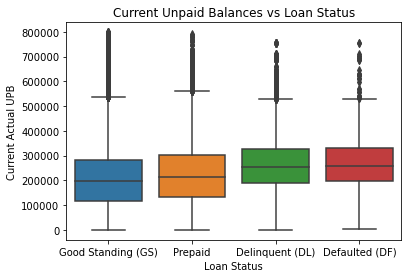

In [44]:
ax5=sns.boxplot(x='Target1',y='Current Actual UPB',data=df)
ax5.set_xlabel('Loan Status')
ax5.set_title('Current Unpaid Balances vs Loan Status')
plt.show()

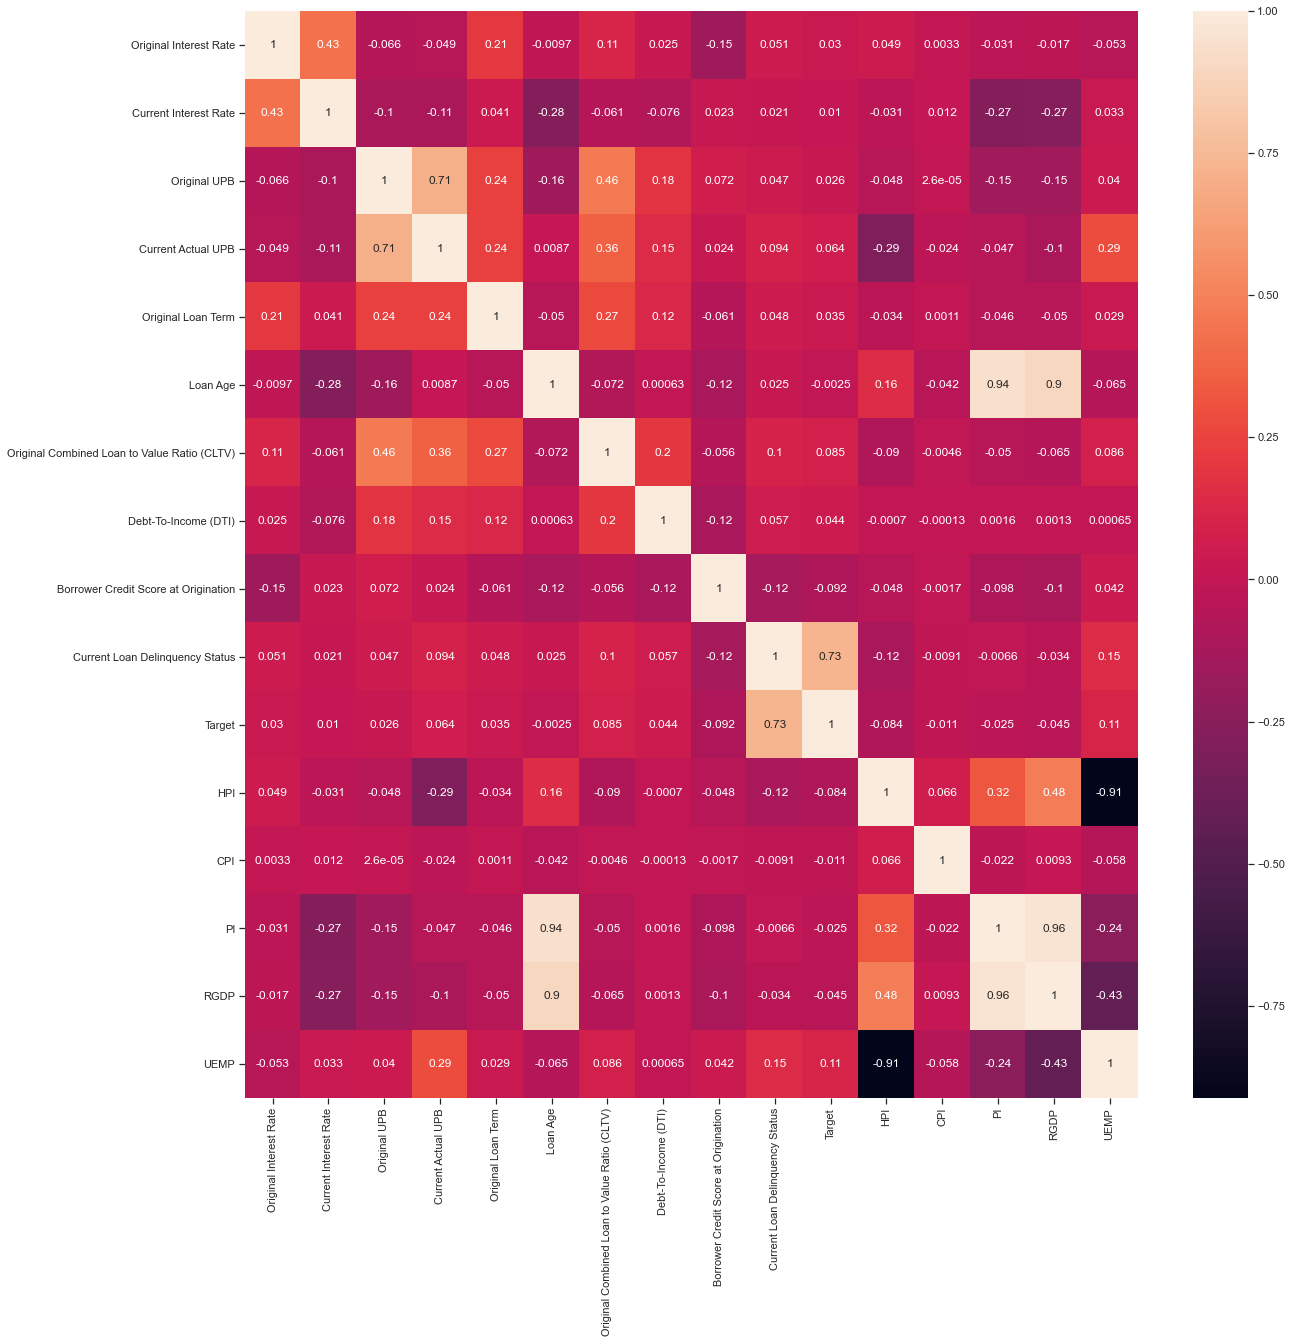

In [59]:
plt.figure(figsize=(20,20))
cor_max=df.corr()
sns.heatmap(cor_max,annot=True)
plt.show()

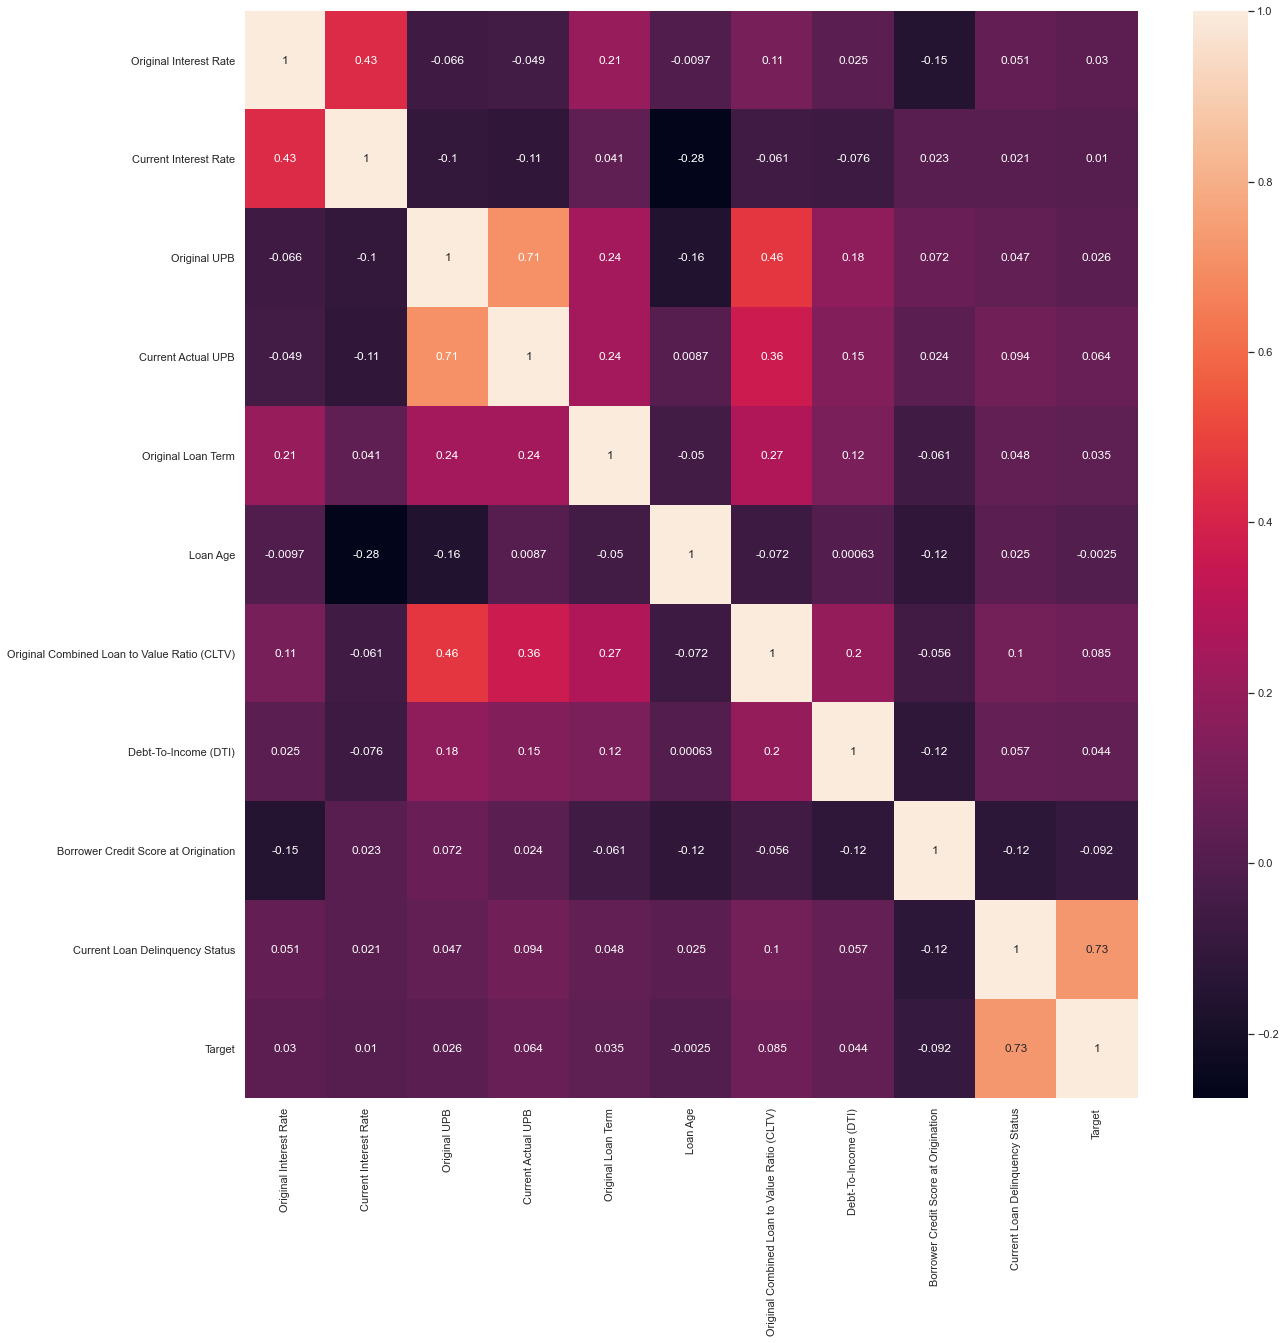

In [74]:
#removing the exogenous features as they will undergo PCA, and removing them first is the key
df=df.drop(['HPI','CPI','PI','RGDP','UEMP'],axis=1)
plt.figure(figsize=(20,20))
cor_max=df.corr()
sns.heatmap(cor_max,annot=True)
plt.show()
#the current and the original interest rates have some degree of correlation, CLTV and UPB have mild correlation, but CLDS and target have very high correlation

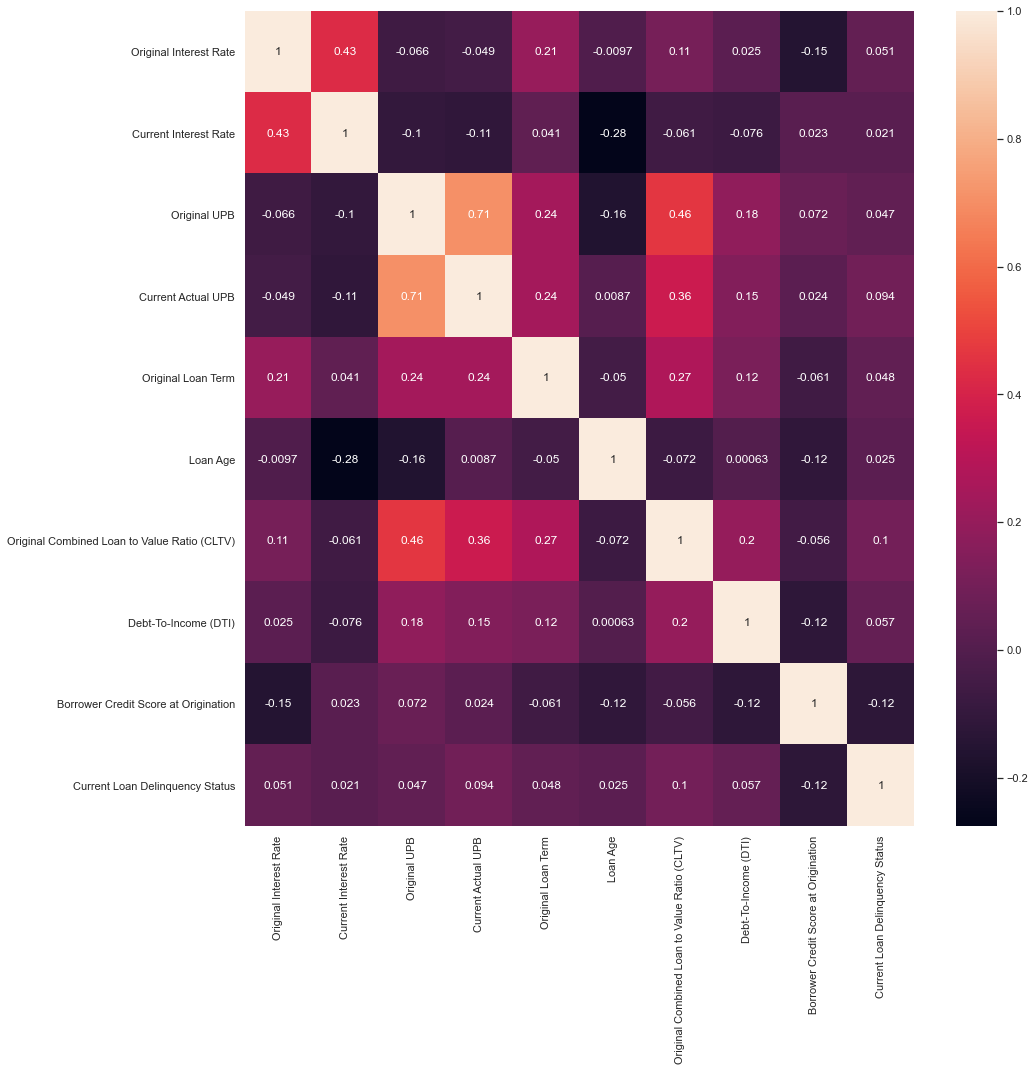

In [75]:
df2=df.drop(['Target','Target1'],axis=1)
plt.figure(figsize=(15,15))
cor_max=df2.corr()
sns.heatmap(cor_max,annot=True)
plt.show()

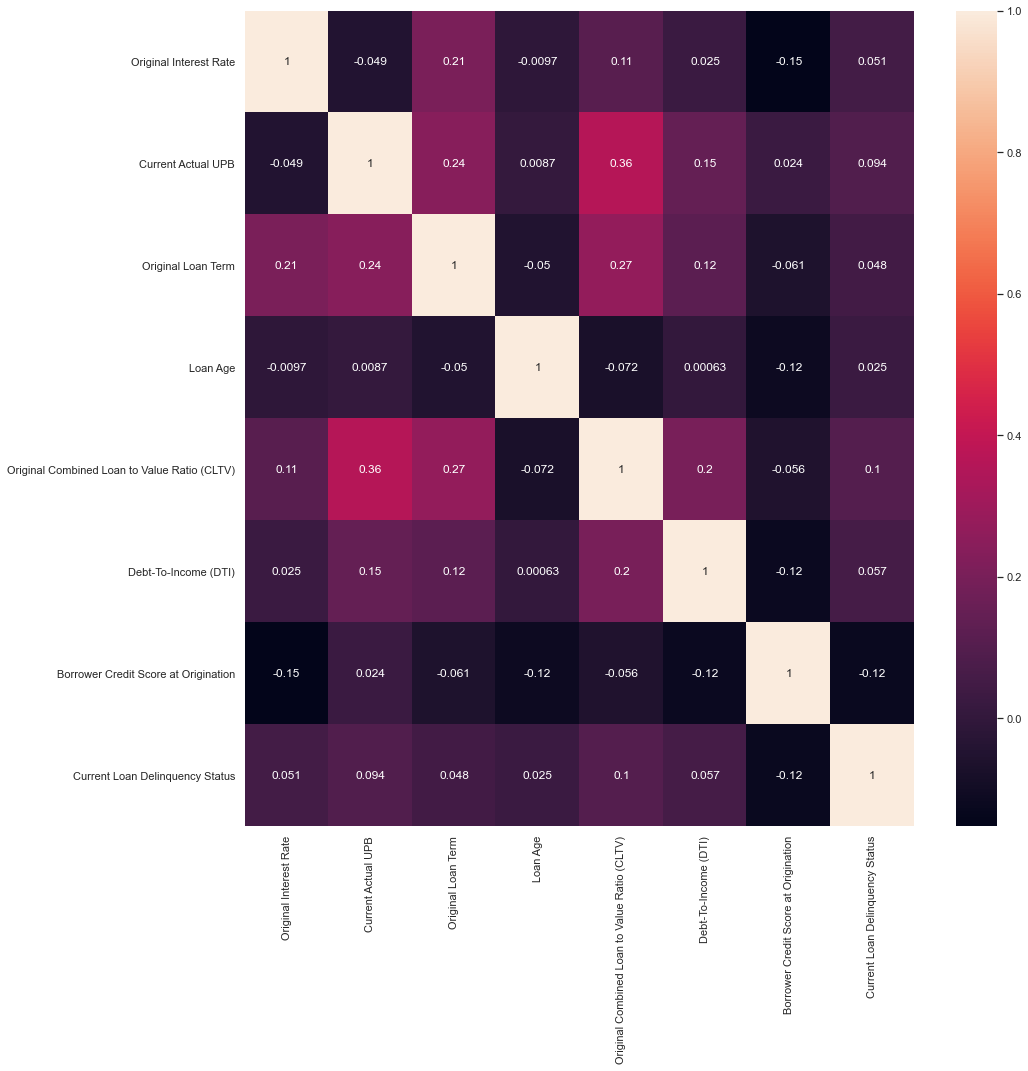

In [76]:
#dropping original UPB, Current Interest rate (lower correlation)
df2=df2.drop(['Original UPB','Current Interest Rate'],axis=1)
plt.figure(figsize=(15,15))
cor_max=df2.corr()
sns.heatmap(cor_max,annot=True)
plt.show()

In [ ]:
#final features
X=df_backup[df2.columns]
y=df_backup['Target']